In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime

In [119]:
import warnings
warnings.filterwarnings("ignore")

In [120]:
import yfinance as yf
df = yf.download('AAPL',start='2005-01-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.958030,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.967869,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.976345,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.977102,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.048247,2227450400
...,...,...,...,...,...,...
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200


In [121]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.958030,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.967869,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.976345,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.977102,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.048247,2227450400


In [122]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)

In [123]:
df.head()

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400


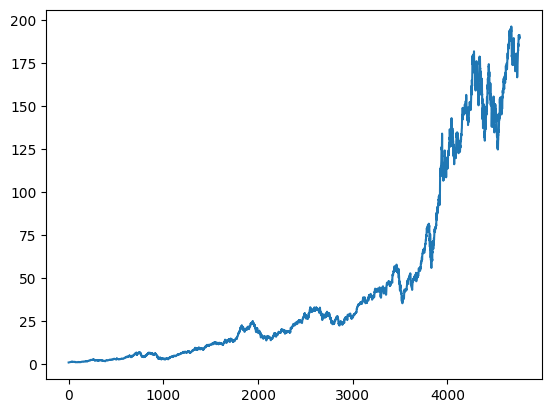

In [124]:
plt.plot(df.Close)

In [125]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


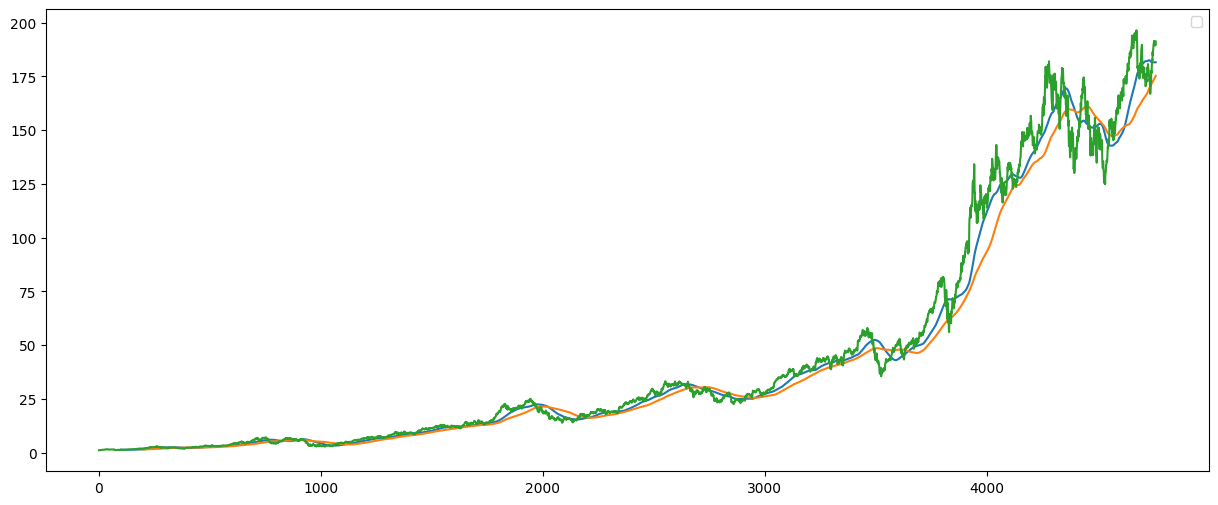

In [126]:
plt.figure(figsize=(15,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
plt.legend()

In [127]:
df.shape

(4762, 5)

In [130]:
df1=df.reset_index()['Close']
df1

0         1.130179
1         1.141786
2         1.151786
3         1.152679
4         1.236607
           ...    
4757    189.789993
4758    190.399994
4759    189.369995
4760    189.949997
4761    191.240005
Name: Close, Length: 4762, dtype: float64

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(4762, 1)

In [136]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [139]:
train_data.shape

(3095, 1)

In [140]:
test_data.shape

(1667, 1)

In [142]:

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [143]:
print(X_train.shape), print(y_train.shape)

(2994, 100)
(2994,)


(None, None)

In [144]:
print(X_test.shape), print(ytest.shape)

(1566, 100)
(1566,)


(None, None)

In [145]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)